In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



In [53]:
pwd

'/Users/frankbarbera/Library/CloudStorage/OneDrive-GettysburgCollege/DS 325/Barbera_Ipeker_SportsFinal'

In [54]:
df = pd.read_csv('stats.csv')

print(df.head())

  "last_name, first_name","player_id","year","pa","k_percent","bb_percent","batting_avg","slg_percent","on_base_percent","b_rbi","r_run","woba","xwoba","exit_velocity_avg","launch_angle_avg","barrel_batted_rate","hard_hit_percent","avg_best_speed","avg_hyper_speed","whiff_percent","swing_percent"
0  "Miller, Owen",680911,2023,314,19.4,5.4,".261"...                                                                                                                                                                                                                                                     
1  "Correa, Carlos",621043,2023,580,22.6,10.2,".2...                                                                                                                                                                                                                                                     
2  "McCarthy, Jake",664983,2023,312,19.9,8.3,".24...                                                      

In [55]:
with open('stats.csv', 'r') as file:
    lines = file.readlines()

cleaned_lines = [line.replace('"', '') for line in lines]

with open('stats_cleaned.csv', 'w') as file:
    file.writelines(cleaned_lines)

df = pd.read_csv('stats_cleaned.csv')
print(df.head())

  last_name  first_name  player_id  year   pa  k_percent  bb_percent  \
0    Miller        Owen     680911  2023  314       19.4         5.4   
1    Correa      Carlos     621043  2023  580       22.6        10.2   
2  McCarthy        Jake     664983  2023  312       19.9         8.3   
3    Naylor          Bo     666310  2023  230       23.0        13.0   
4     Bader    Harrison     664056  2023  344       17.2         4.9   

   batting_avg  slg_percent  on_base_percent  ...   woba  xwoba  \
0        0.261        0.371            0.303  ...  0.292  0.288   
1        0.230        0.399            0.312  ...  0.309  0.327   
2        0.243        0.326            0.318  ...  0.289  0.293   
3        0.237        0.470            0.339  ...  0.347  0.309   
4        0.232        0.348            0.274  ...  0.271  0.288   

   exit_velocity_avg  launch_angle_avg  barrel_batted_rate  hard_hit_percent  \
0               86.3              12.9                 3.4              30.8   
1   

In [56]:
old_metrics = ['batting_avg', 'on_base_percent', 'slg_percent']
advanced_metrics = ['exit_velocity_avg', 'launch_angle_avg', 'barrel_batted_rate', 'hard_hit_percent']

X = df[old_metrics + advanced_metrics]
y = df['r_run']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_old_train = X_train[old_metrics]
X_old_test = X_test[old_metrics]

model_old = LinearRegression()
model_old.fit(X_old_train, y_train)
y_old_pred = model_old.predict(X_old_test)

mse_old = mean_squared_error(y_test, y_old_pred)
r2_old = r2_score(y_test, y_old_pred)

print(f"Old Metrics - Mean Squared Error: {mse_old}")
print(f"Old Metrics - R-squared: {r2_old}")

X_advanced_train = X_train[advanced_metrics]
X_advanced_test = X_test[advanced_metrics]

model_advanced = LinearRegression()
model_advanced.fit(X_advanced_train, y_train)
y_advanced_pred = model_advanced.predict(X_advanced_test)

mse_advanced = mean_squared_error(y_test, y_advanced_pred)
r2_advanced = r2_score(y_test, y_advanced_pred)

print(f"Advanced Metrics - Mean Squared Error: {mse_advanced}")
print(f"Advanced Metrics - R-squared: {r2_advanced}")

Old Metrics - Mean Squared Error: 308.9241806863274
Old Metrics - R-squared: 0.4549106806005513
Advanced Metrics - Mean Squared Error: 531.0756743742703
Advanced Metrics - R-squared: 0.06292968957257683


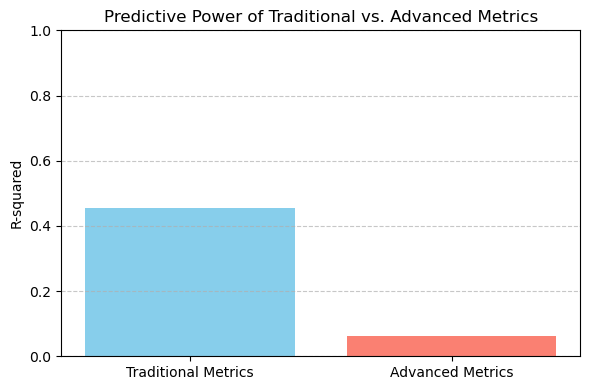

In [57]:
r2_traditional = 0.4549
r2_advanced = 0.0629

plt.figure(figsize=(6, 4))
plt.bar(['Traditional Metrics', 'Advanced Metrics'], [r2_traditional, r2_advanced], color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('R-squared')
plt.title('Predictive Power of Traditional vs. Advanced Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

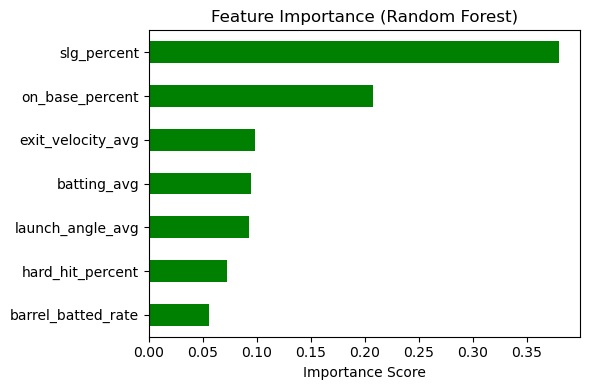

In [58]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh', color='green', figsize=(6, 4))
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [59]:
rf_model_trad = RandomForestRegressor(random_state=42)
rf_model_trad.fit(X_train, y_train)

y_pred_rf_trad = rf_model_trad.predict(X_test)

mse_rf_trad = mean_squared_error(y_test, y_pred_rf_trad)
r2_rf_trad = r2_score(y_test, y_pred_rf_trad)

print(f'Random Forest (Traditional) - MSE: {mse_rf_trad:.2f}')
print(f'Random Forest (Traditional) - R2: {r2_rf_trad:.4f}')


Random Forest (Traditional) - MSE: 387.74
Random Forest (Traditional) - R2: 0.3158


In [60]:
rf_model_adv = RandomForestRegressor(random_state=42)
rf_model_adv.fit(X_advanced_train, y_train)

y_pred_rf_adv = rf_model_adv.predict(X_advanced_test)

mse_rf_adv = mean_squared_error(y_test, y_pred_rf_adv)
r2_rf_adv = r2_score(y_test, y_pred_rf_adv)

print(f'Random Forest (Advanced) - MSE: {mse_rf_adv:.2f}')
print(f'Random Forest (Advanced) - R2: {r2_rf_adv:.4f}')


Random Forest (Advanced) - MSE: 589.52
Random Forest (Advanced) - R2: -0.0402


In [61]:
df['last_name, first_name'] = df['last_name'] + ', ' + df[' first_name']

df[['last_name, first_name', 'r_run']].sort_values(by='r_run', ascending=False).head()

,"last_name, first_name",r_run
177,"Acuña Jr., Ronald",149
21,"Freeman, Freddie",131
50,"Olson, Matt",127
132,"Betts, Mookie",126
179,"Semien, Marcus",122


In [62]:
train_r2 = model_old.score(X_old_train, y_train)
test_r2 = model_old.score(X_old_test, y_test)
print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")

Train R2: 0.4345, Test R2: 0.4549


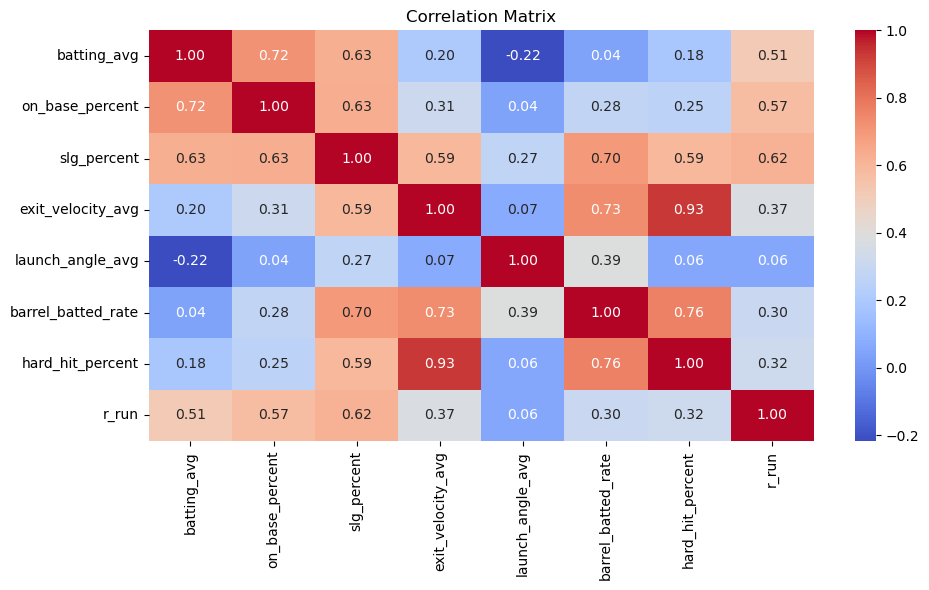

In [63]:
corr = df[old_metrics + advanced_metrics + ['r_run']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

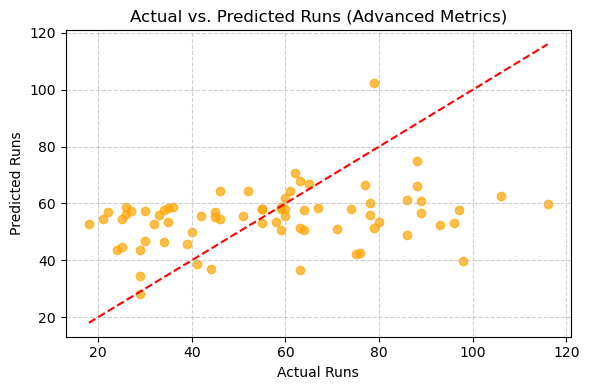

In [64]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_advanced_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs. Predicted Runs (Advanced Metrics)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


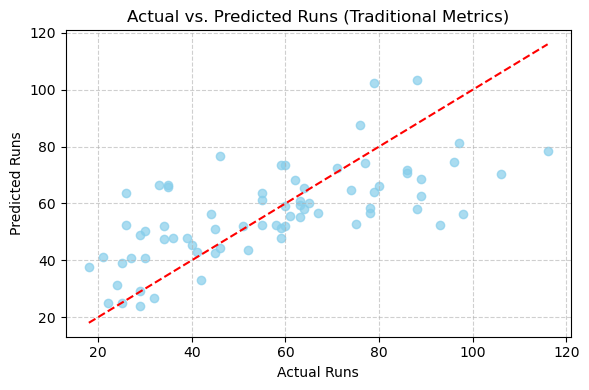

In [65]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_old_pred, alpha=0.7, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs. Predicted Runs (Traditional Metrics)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
